# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#Observations
---------------------

* 1) We can see from our regression analysis that there are strong correlations between latitude and temperature.
------------------------------------------------------------------------------------------------------------------------------
* 2) We can see from the regression analysis that there is correlation between latitude and the other relationships, but they have weak correlation. While latitude might have some impact, there are several other geographical factors that might have a greater impact.
------------------------------------------------------------------------------------------------------------------------------
* 3) The number of cities in the Northern Hemisphere data was 598, and 253 in the Southern Hemisphere. This was due to randomly generating the latitude coordinates at the beginning of the code. I feel like we got a more accurate sample of Northern Hemisphere weather data when compared to Southern Hemisphere data. We could run the code a few more times or at greater quantity to see how the data might have changed.


In [ ]:
# import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import requests
import json
from api_keys import weather_api_key
from citipy import citipy
import random
import decimal
import time

## Generate Cities List

In [18]:
#set up latitude and longitude lists
latitude_list = []
longitude_list = []

# Generate 1000 random latitude and logitude values and add them to there respective list
for x in range(0, 2500):
    latitude = float(decimal.Decimal(random.randrange(-9000, 9000))/100)
    longitude = float(decimal.Decimal(random.randrange(-18000, 18000))/100)
    latitude_list.append(latitude)
    longitude_list.append(longitude)

# Set up the Weather DF
weather_df = pd.DataFrame({"Latitude": latitude_list, "Longitude": longitude_list})

# set up list to hold city names and what there country there from
city_list = []
country_list = []

# goes through each value of Latitude and Longitude in the Weather DF and uses the value as inputs to determin there city and country
for a in range(0, len(weather_df["Latitude"])):
    lat_value = weather_df.iloc[a]["Latitude"]
    long_value = weather_df.iloc[a]["Longitude"]    
    city_cord = citipy.nearest_city(lat_value, long_value)
    city_name = city_cord.city_name
    city_list.append(city_name)
    country = city_cord.country_code
    country_list.append(country)

    
# adds the city and country lists into our weather data frame, and then a touch of formatting   
weather_df["City"] = city_list
weather_df["Country"] = country_list
weather_df["City"] = weather_df["City"].str.title()
weather_df["Country"] = weather_df["Country"].str.upper()


#drop duplicates duplicates
weather_df = weather_df.drop_duplicates(subset=["City", "Country"], keep="first")
weather_df = weather_df.reset_index(drop=True)

print("Total number of unique cities in weather dataframe is: " + str(len(weather_df.index)))


Total number of unique cities in weather dataframe is: 928


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [19]:
# Set up list for variables we want
temperature_list = [] 
humidity_list = []
cloudiness_list = []
wind_speed_list = []
date_list = []
# Base URL before adding variable componets
url = "http://api.openweathermap.org/data/2.5/weather?"

    

for target in range(0, len(weather_df.index)):
    
    # Select city on weather DF, and formate for proper url code in event city has spaces in name
    target_city = weather_df.iloc[target]["City"]
    target_city = target_city.replace(" ","+")
    
    # Build query URL
    query_url = f"{url}appid={weather_api_key}&q={target_city}&units=imperial"
    
    # Use URL to make a request of information, bring back in the json format, and print URL
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    print(f"Currently on {(target + 1)} out of {(len(weather_df.index))}")
    print(query_url)
    
    # This will collect and store desired information, but if there is an error it will print a line and move on to next
    try:
        cities_temp = weather_json["main"]["temp"]
        temperature_list.append(cities_temp)
        
        cities_humid = weather_json["main"]["humidity"]
        humidity_list.append(cities_humid)
        
        cities_cloud = weather_json["clouds"]["all"]
        cloudiness_list.append(cities_cloud)
        
        cities_wind = weather_json["wind"]["speed"]
        wind_speed_list.append(cities_wind)
        
        cities_date = weather_json["dt"]
        date_list.append(cities_date)
    except:
        print("I'm afraid I can't do that Dave. There seems to have been an error. Let's try the next city.")
        
        # Usuccessful API request will result in a blank value in list that will throw off list alignment
        # We will but in a dummy value in its place to clean out later
        temperature_list.append("Error")
        humidity_list.append("Error")
        cloudiness_list.append("Error")
        wind_speed_list.append("Error")
        date_list.append("Error")
    print()
    
    # Add a sleep timer to prevent my API requests from going over 60 per min and causing a 1 hour lock out.
    time.sleep(1) # in seconds



Currently on 1 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Souillac&units=imperial

Currently on 2 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Cape+Town&units=imperial

Currently on 3 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Codrington&units=imperial

Currently on 4 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Rikitea&units=imperial

Currently on 5 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Montague&units=imperial

Currently on 6 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Margate&units=imperial

Currently on 7 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Cockburn+Town&units=imperial

Currently on 8 out of

Currently on 58 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Sitka&units=imperial

Currently on 59 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Bafoulabe&units=imperial

Currently on 60 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Mragowo&units=imperial

Currently on 61 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Thompson&units=imperial

Currently on 62 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Provideniya&units=imperial

Currently on 63 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Praia&units=imperial

Currently on 64 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Saleaula&units=imperial
I'm afraid I can't do th

Currently on 115 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Andevoranto&units=imperial
I'm afraid I can't do that Dave. There seems to have been an error. Let's try the next city.

Currently on 116 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Along&units=imperial

Currently on 117 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Sentyabrskiy&units=imperial
I'm afraid I can't do that Dave. There seems to have been an error. Let's try the next city.

Currently on 118 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Ahuimanu&units=imperial

Currently on 119 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=The+Valley&units=imperial

Currently on 120 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693d

Currently on 167 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Sukumo&units=imperial

Currently on 168 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Seymchan&units=imperial

Currently on 169 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Grand+Baie&units=imperial

Currently on 170 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Arlit&units=imperial

Currently on 171 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Nola&units=imperial

Currently on 172 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Zhigansk&units=imperial

Currently on 173 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Mandera&units=imperial

Currently on 174 out 

Currently on 223 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Sambava&units=imperial

Currently on 224 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Palmerston&units=imperial

Currently on 225 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Pisco&units=imperial

Currently on 226 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Turka&units=imperial

Currently on 227 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Pangnirtung&units=imperial

Currently on 228 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Coquimbo&units=imperial

Currently on 229 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Keflavik&units=imperial

Currently on 23

Currently on 279 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Marawi&units=imperial

Currently on 280 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Half+Moon+Bay&units=imperial

Currently on 281 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Bunia&units=imperial

Currently on 282 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Paoua&units=imperial

Currently on 283 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Riwaka&units=imperial

Currently on 284 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=San+Luis&units=imperial

Currently on 285 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Lebu&units=imperial

Currently on 286 out o

Currently on 335 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Tainan&units=imperial

Currently on 336 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Gao&units=imperial

Currently on 337 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Saint-Pierre&units=imperial

Currently on 338 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Fevralsk&units=imperial
I'm afraid I can't do that Dave. There seems to have been an error. Let's try the next city.

Currently on 339 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Nouadhibou&units=imperial

Currently on 340 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Malur&units=imperial

Currently on 341 out of 928
http://api.openweathermap.org/data/2.

Currently on 390 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Dillon&units=imperial

Currently on 391 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Hvolsvollur&units=imperial

Currently on 392 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Santa+Barbara&units=imperial

Currently on 393 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Carutapera&units=imperial

Currently on 394 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Poum&units=imperial

Currently on 395 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Dhandhuka&units=imperial

Currently on 396 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Pangai&units=imperial

Currently 

Currently on 446 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Beckley&units=imperial

Currently on 447 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Vangaindrano&units=imperial

Currently on 448 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Panagar&units=imperial

Currently on 449 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Kpandae&units=imperial

Currently on 450 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Brahmapuri&units=imperial
I'm afraid I can't do that Dave. There seems to have been an error. Let's try the next city.

Currently on 451 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Olafsvik&units=imperial

Currently on 452 out of 928
http://api.openweathermap.org/

Currently on 498 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Port+Shepstone&units=imperial

Currently on 499 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Miri&units=imperial

Currently on 500 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Saint-Jovite&units=imperial

Currently on 501 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Kushima&units=imperial

Currently on 502 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Chapais&units=imperial

Currently on 503 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Cap+Malheureux&units=imperial

Currently on 504 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Ponta+Do+Sol&units=imperial


Currently on 553 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Xining&units=imperial

Currently on 554 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Rostaq&units=imperial
I'm afraid I can't do that Dave. There seems to have been an error. Let's try the next city.

Currently on 555 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Pala&units=imperial

Currently on 556 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Fort+Saint+John&units=imperial
I'm afraid I can't do that Dave. There seems to have been an error. Let's try the next city.

Currently on 557 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Mogadishu&units=imperial

Currently on 558 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4

Currently on 607 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Nauta&units=imperial

Currently on 608 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Banda+Aceh&units=imperial

Currently on 609 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Faya&units=imperial

Currently on 610 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Sokoni&units=imperial

Currently on 611 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Vilhena&units=imperial

Currently on 612 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Kawalu&units=imperial

Currently on 613 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Farafangana&units=imperial

Currently on 614 out

Currently on 664 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Urucara&units=imperial

Currently on 665 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Dunedin&units=imperial

Currently on 666 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Lumeje&units=imperial

Currently on 667 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Lamar&units=imperial

Currently on 668 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Alice+Springs&units=imperial

Currently on 669 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Yueyang&units=imperial

Currently on 670 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Bulls&units=imperial

Currently on 671 ou

Currently on 720 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Marquette&units=imperial

Currently on 721 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Tarudant&units=imperial
I'm afraid I can't do that Dave. There seems to have been an error. Let's try the next city.

Currently on 722 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Trelew&units=imperial

Currently on 723 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Kemijarvi&units=imperial

Currently on 724 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Kaeo&units=imperial

Currently on 725 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Kampene&units=imperial

Currently on 726 out of 928
http://api.openweathermap.org/data/2.5

Currently on 777 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Salantai&units=imperial

Currently on 778 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Wahran&units=imperial
I'm afraid I can't do that Dave. There seems to have been an error. Let's try the next city.

Currently on 779 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Hihifo&units=imperial
I'm afraid I can't do that Dave. There seems to have been an error. Let's try the next city.

Currently on 780 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Lensk&units=imperial

Currently on 781 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Linden&units=imperial

Currently on 782 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Na

Currently on 833 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Filingue&units=imperial

Currently on 834 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Tomatlan&units=imperial

Currently on 835 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Pemba&units=imperial

Currently on 836 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Ciras&units=imperial
I'm afraid I can't do that Dave. There seems to have been an error. Let's try the next city.

Currently on 837 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Pinawa&units=imperial

Currently on 838 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Somotillo&units=imperial

Currently on 839 out of 928
http://api.openweathermap.org/data/2.5/w

Currently on 890 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Abaete&units=imperial

Currently on 891 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Ulyanovo&units=imperial
I'm afraid I can't do that Dave. There seems to have been an error. Let's try the next city.

Currently on 892 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Port+Hawkesbury&units=imperial

Currently on 893 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Duki&units=imperial

Currently on 894 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Aginskoye&units=imperial

Currently on 895 out of 928
http://api.openweathermap.org/data/2.5/weather?appid=b25308977725b83101693dd059c4f501&q=Kahului&units=imperial

Currently on 896 out of 928
http://api.openweathermap.org/da

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [54]:
# Add collected weather data to Weather DF
weather_df["Temperature (F)"] = temperature_list
weather_df["Humidity (%)"] = humidity_list
weather_df["Cloud Cover (%)"] = cloudiness_list
weather_df["Wind Speed (MPH)"] = wind_speed_list
weather_df["Date (UTC)"] = date_list

# Drop rows where we assigned Error too, because there was no data to pull
weather_df_v2 = weather_df[weather_df["Temperature (F)"] != "Error"]

# Reset Index after removing errors
weather_df_v2 = weather_df_v2.reset_index(drop=True)



# Save DF as .csv
weather_df_v2.to_csv("weather_data.csv")

print("Total number of unique cities in weather dataframe is: " + str(len(weather_df_v2.index)))
weather_df_v2.head(5)

Total number of unique cities in weather dataframe is: 851


,Latitude,Longitude,City,Country,Temperature (F),Humidity (%),Cloud Cover (%),Wind Speed (MPH),Date (UTC)
0,-49.34,71.83,Souillac,MU,75.2,73,75,16.11,1603682300
1,-63.69,-12.97,Cape Town,ZA,59.56,87,0,6.93,1603682217
2,26.90,-45.04,Codrington,AG,57.6,65,3,22.32,1603682206
3,-50.16,-121.36,Rikitea,PF,73.51,82,100,20.31,1603682185
4,46.39,-62.78,Montague,CA,39.67,81,36,1.25,1603682304


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [42]:
#  Get list of the indices of cities that have humidity over 100%.

over_100 = weather_df_v2.index[weather_df_v2["Humidity (%)"] > 100].tolist()
print(over_100)

[]


In [46]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df_v2.drop(over_100)


clean_city_data = clean_city_data.reset_index(drop=True)
print("Total number of unique cities in weather dataframe is: " + str(len(weather_df_v2.index)))
clean_city_data.head(100)

Total number of unique cities in weather dataframe is: 851


,Latitude,Longitude,City,Country,Temperature (F),Humidity (%),Cloud Cover (%),Wind Speed (MPH),Date (UTC)
0,-49.34,71.83,Souillac,MU,75.2,73,75,16.11,1603682300
1,-63.69,-12.97,Cape Town,ZA,59.56,87,0,6.93,1603682217
2,26.90,-45.04,Codrington,AG,57.6,65,3,22.32,1603682206
3,-50.16,-121.36,Rikitea,PF,73.51,82,100,20.31,1603682185
4,46.39,-62.78,Montague,CA,39.67,81,36,1.25,1603682304
...,...,...,...,...,...,...,...,...,...
95,69.86,-80.09,Clyde River,CA,12.2,85,90,5.82,1603682208
96,-63.80,175.99,Kaitangata,NZ,53.01,58,96,8.99,1603682416
97,22.68,84.36,Simdega,IN,76.75,49,0,1.61,1603682417
98,10.20,-163.16,Makakilo City,US,82.63,55,40,5.82,1603682241


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

This plot is comparing the latitude and temperature of each city in the data frame. We can see that as latitude is closer to zero, the equator, the higher the temperature is.


<function matplotlib.pyplot.show(*args, **kw)>

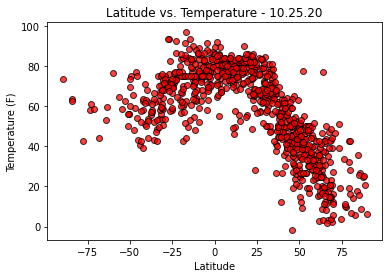

In [69]:
# Set Axises
x_axis = clean_city_data["Latitude"]
y_axis = clean_city_data["Temperature (F)"]

# Create Scatter Plot
fig_1 = plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

# Set Lables and other
plt.title("Latitude vs. Temperature - 10.25.20")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

fig_1.figure.savefig('lat_v_temp.png')

print("This plot is comparing the latitude and temperature of each city in the data frame. We can see that as latitude is closer to zero, the equator, the higher the temperature is.")

plt.show

## Latitude vs. Humidity Plot

This plot is comparing the latitude and humidity of each city in the data frame. There does not seem to be much of a relationship.


<function matplotlib.pyplot.show(*args, **kw)>

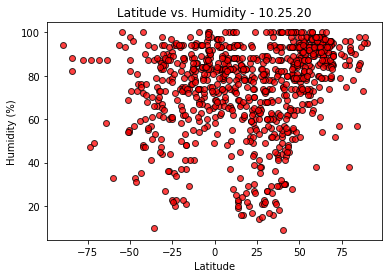

In [70]:
# Set Axises
x_axis = clean_city_data["Latitude"]
y_axis = clean_city_data["Humidity (%)"]

# Create Scatter Plot
fig_2 = plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

# Set Lables and other
plt.title("Latitude vs. Humidity - 10.25.20")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

fig_2.figure.savefig('lat_v_humid.png')

print("This plot is comparing the latitude and humidity of each city in the data frame. There does not seem to be much of a relationship.")



plt.show

## Latitude vs. Cloudiness Plot

This plot is comparing the latitude and cloudiness of each city in the data frame. There does not seem to be much of a relationship.


<function matplotlib.pyplot.show(*args, **kw)>

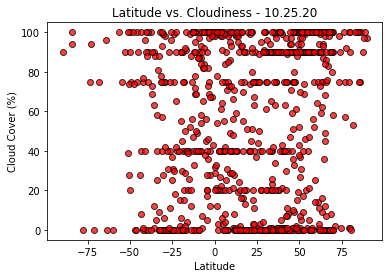

In [71]:
# Set Axises
x_axis = clean_city_data["Latitude"]
y_axis = clean_city_data["Cloud Cover (%)"]

# Create Scatter Plot
fig_3 = plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

# Set Lables and other
plt.title("Latitude vs. Cloudiness - 10.25.20")
plt.xlabel("Latitude")
plt.ylabel("Cloud Cover (%)")

fig_3.figure.savefig('lat_v_cloud.png')


print("This plot is comparing the latitude and cloudiness of each city in the data frame. There does not seem to be much of a relationship.")



plt.show

## Latitude vs. Wind Speed Plot

This plot is comparing the latitude and wind speed of each city in the data frame. There does not seem to be much of a relationship.


<function matplotlib.pyplot.show(*args, **kw)>

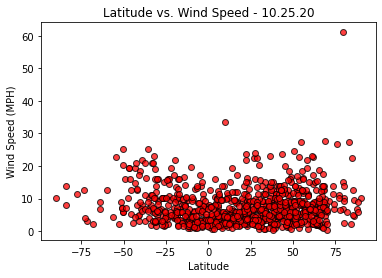

In [72]:
# Set Axises
x_axis = clean_city_data["Latitude"]
y_axis = clean_city_data["Wind Speed (MPH)"]

# Create Scatter Plot
fig_4 = plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

# Set Lables and other
plt.title("Latitude vs. Wind Speed - 10.25.20")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")

fig_4.figure.savefig('lat_v_wind.png')


print("This plot is comparing the latitude and wind speed of each city in the data frame. There does not seem to be much of a relationship.")




plt.show

## Linear Regression

In [115]:
# Set Clean City DF to North and South Hemispheres
north_hem = clean_city_data[clean_city_data["Latitude"] > 0]
south_hem = clean_city_data[clean_city_data["Latitude"] < 0]
print("Total number of unique cities in Northern Hemisphere is: " + str(len(north_hem.index)))
print("Total number of unique cities in Southern Hemisphere is: " + str(len(south_hem.index)))

Total number of unique cities in Northern Hemisphere is: 598
Total number of unique cities in Southern Hemisphere is: 253


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is -0.86
This plot is comparing the latitude and temperature of each city in the data frame. We can see that as latitude is closer to zero, the equator, the higher the temperature is.


<function matplotlib.pyplot.show(*args, **kw)>

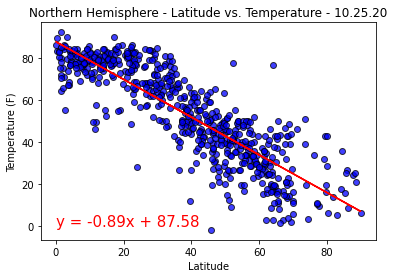

In [94]:
# Set Axises

x_axis = north_hem["Latitude"]
y_axis = north_hem["Temperature (F)"]

# Create Scatter Plot
fig_5 = plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Set Lables and other
plt.title("Northern Hemisphere - Latitude vs. Temperature - 10.25.20")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")


# calculate correlation coefficient
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# calculates the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis.astype(float) ,y_axis.astype(float))
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=15,color="red")




fig_5.figure.savefig('n_hem_lat_v_temp.png')

print("This plot is comparing the latitude and temperature of each city in the data frame. We can see that as latitude is closer to zero, the equator, the higher the temperature is.")

plt.show

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is 0.51
This plot is comparing the latitude and temperature of each city in the data frame. We can see that as latitude is closer to zero, the equator, the higher the temperature is.


<function matplotlib.pyplot.show(*args, **kw)>

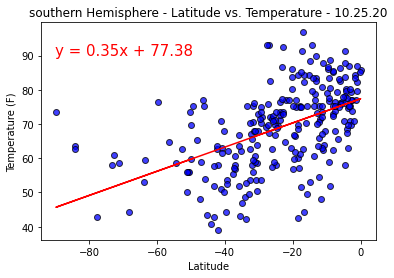

In [95]:
# Set Axises

x_axis = south_hem["Latitude"]
y_axis = south_hem["Temperature (F)"]

# Create Scatter Plot
fig_6 = plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Set Lables and other
plt.title("southern Hemisphere - Latitude vs. Temperature - 10.25.20")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")


# calculate correlation coefficient
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# calculates the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis.astype(float) ,y_axis.astype(float))
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-90, 90),fontsize=15,color="red")




fig_6.figure.savefig('s_hem_lat_v_temp.png')

print("This plot is comparing the latitude and temperature of each city in the data frame. We can see that as latitude is closer to zero, the equator, the higher the temperature is.")

plt.show

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.29
This plot is comparing the latitude and humidity of each city in the data frame. There does not seem to be much of a relationship.


<function matplotlib.pyplot.show(*args, **kw)>

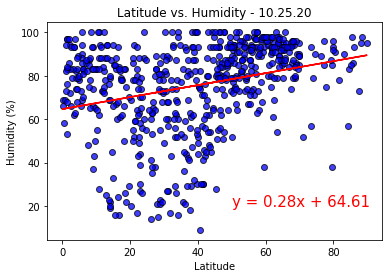

In [103]:
# Set Axises
x_axis = north_hem["Latitude"]
y_axis = north_hem["Humidity (%)"]

# Create Scatter Plot
fig_7 = plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Set Lables and other
plt.title("Latitude vs. Humidity - 10.25.20")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# calculate correlation coefficient
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# calculates the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis.astype(float) ,y_axis.astype(float))
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")



fig_7.figure.savefig('n_hem_lat_v_humid.png')

print("This plot is comparing the latitude and humidity of each city in the data frame. There does not seem to be much of a relationship.")



plt.show

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.13
This plot is comparing the latitude and humidity of each city in the data frame. There does not seem to be much of a relationship.


<function matplotlib.pyplot.show(*args, **kw)>

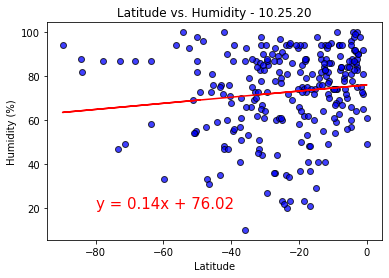

In [104]:
# Set Axises
x_axis = south_hem["Latitude"]
y_axis = south_hem["Humidity (%)"]

# Create Scatter Plot
fig_8 = plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Set Lables and other
plt.title("Latitude vs. Humidity - 10.25.20")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")


# calculate correlation coefficient
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# calculates the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis.astype(float) ,y_axis.astype(float))
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-80,20),fontsize=15,color="red")


fig_8.figure.savefig('s_hem_lat_v_humid.png')

print("This plot is comparing the latitude and humidity of each city in the data frame. There does not seem to be much of a relationship.")



plt.show

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.19
This plot is comparing the latitude and cloudiness of each city in the data frame. There does not seem to be much of a relationship.


<function matplotlib.pyplot.show(*args, **kw)>

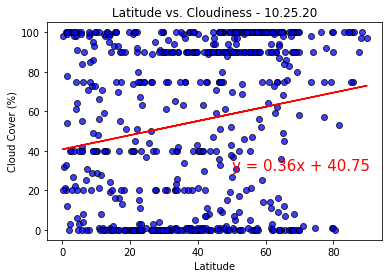

In [107]:
# Set Axises
x_axis = north_hem["Latitude"]
y_axis = north_hem["Cloud Cover (%)"]

# Create Scatter Plot
fig_9 = plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Set Lables and other
plt.title("Latitude vs. Cloudiness - 10.25.20")
plt.xlabel("Latitude")
plt.ylabel("Cloud Cover (%)")

# calculate correlation coefficient
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# calculates the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis.astype(float) ,y_axis.astype(float))
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(50,30),fontsize=15,color="red")



fig_9.figure.savefig('n_hem_lat_v_cloud.png')


print("This plot is comparing the latitude and cloudiness of each city in the data frame. There does not seem to be much of a relationship.")



plt.show

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.05
This plot is comparing the latitude and cloudiness of each city in the data frame. There does not seem to be much of a relationship.


<function matplotlib.pyplot.show(*args, **kw)>

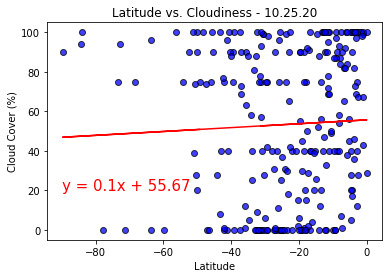

In [111]:
# Set Axises
x_axis = south_hem["Latitude"]
y_axis = south_hem["Cloud Cover (%)"]

# Create Scatter Plot
fig_10 = plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Set Lables and other
plt.title("Latitude vs. Cloudiness - 10.25.20")
plt.xlabel("Latitude")
plt.ylabel("Cloud Cover (%)")

# calculate correlation coefficient
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# calculates the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis.astype(float) ,y_axis.astype(float))
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-90,20),fontsize=15,color="red")




fig_10.figure.savefig('s_hem_lat_v_cloud.png')


print("This plot is comparing the latitude and cloudiness of each city in the data frame. There does not seem to be much of a relationship.")



plt.show

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is 0.18
This plot is comparing the latitude and wind speed of each city in the data frame. There does not seem to be much of a relationship.


<function matplotlib.pyplot.show(*args, **kw)>

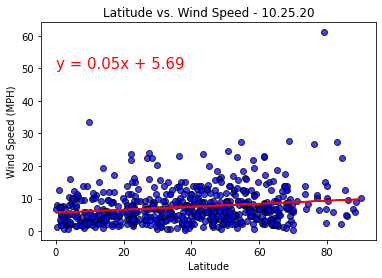

In [112]:
# Set Axises
x_axis = north_hem["Latitude"]
y_axis = north_hem["Wind Speed (MPH)"]

# Create Scatter Plot
fig_11 = plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Set Lables and other
plt.title("Latitude vs. Wind Speed - 10.25.20")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")

# calculate correlation coefficient
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# calculates the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis.astype(float) ,y_axis.astype(float))
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")


fig_11.figure.savefig('n_hem_lat_v_wind.png')


print("This plot is comparing the latitude and wind speed of each city in the data frame. There does not seem to be much of a relationship.")




plt.show

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is -0.31
This plot is comparing the latitude and wind speed of each city in the data frame. There does not seem to be much of a relationship.


<function matplotlib.pyplot.show(*args, **kw)>

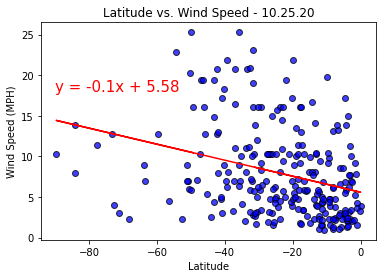

In [114]:
# Set Axises
x_axis = south_hem["Latitude"]
y_axis = south_hem["Wind Speed (MPH)"]

# Create Scatter Plot
fig_12 = plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Set Lables and other
plt.title("Latitude vs. Wind Speed - 10.25.20")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")

# calculate correlation coefficient
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# calculates the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis.astype(float) ,y_axis.astype(float))
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-90,18),fontsize=15,color="red")


fig_12.figure.savefig('s_hem_lat_v_wind.png')


print("This plot is comparing the latitude and wind speed of each city in the data frame. There does not seem to be much of a relationship.")




plt.show